# Continuous Control

---

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [12]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train a DDPG agent

In [7]:
from ddpg_agent import Agent
from collections import deque
import torch
agent = Agent(33, 4, 0)

In [8]:
env_info = env.reset(train_mode=True)[brain_name]
env_info.vector_observations.shape

(20, 33)

In [9]:

def ddpg(n_episodes=1000, max_t=300, print_every=1):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros((20,))
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.array(rewards)
            if any(dones):
                break 
                
        
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, scores[-1]))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            if len(scores_deque) == 100 and np.mean(scores_deque) >= 30:
                print('Done! Yay!')
                break
            
    return scores

scores = ddpg()


Episode 1	Score: 0.32
Episode 1	Average Score: 0.32
Episode 2	Score: 0.40
Episode 2	Average Score: 0.36
Episode 3	Score: 0.54
Episode 3	Average Score: 0.42
Episode 4	Score: 0.59
Episode 4	Average Score: 0.46
Episode 5	Score: 0.60
Episode 5	Average Score: 0.49
Episode 6	Score: 0.72
Episode 6	Average Score: 0.53
Episode 7	Score: 1.00
Episode 7	Average Score: 0.60
Episode 8	Score: 1.09
Episode 8	Average Score: 0.66
Episode 9	Score: 1.63
Episode 9	Average Score: 0.77
Episode 10	Score: 1.72
Episode 10	Average Score: 0.86
Episode 11	Score: 2.32
Episode 11	Average Score: 0.99
Episode 12	Score: 2.25
Episode 12	Average Score: 1.10
Episode 13	Score: 2.69
Episode 13	Average Score: 1.22
Episode 14	Score: 3.77
Episode 14	Average Score: 1.40
Episode 15	Score: 4.16
Episode 15	Average Score: 1.59
Episode 16	Score: 5.68
Episode 16	Average Score: 1.84
Episode 17	Score: 6.22
Episode 17	Average Score: 2.10
Episode 18	Score: 6.62
Episode 18	Average Score: 2.35
Episode 19	Score: 5.66
Episode 19	Average Scor

Episode 148	Score: 32.68
Episode 148	Average Score: 24.05
Episode 149	Score: 34.27
Episode 149	Average Score: 24.21
Episode 150	Score: 34.84
Episode 150	Average Score: 24.39
Episode 151	Score: 31.47
Episode 151	Average Score: 24.53
Episode 152	Score: 32.48
Episode 152	Average Score: 24.68
Episode 153	Score: 32.52
Episode 153	Average Score: 24.82
Episode 154	Score: 31.17
Episode 154	Average Score: 24.94
Episode 155	Score: 31.48
Episode 155	Average Score: 25.07
Episode 156	Score: 33.44
Episode 156	Average Score: 25.21
Episode 157	Score: 32.12
Episode 157	Average Score: 25.33
Episode 158	Score: 32.23
Episode 158	Average Score: 25.46
Episode 159	Score: 32.49
Episode 159	Average Score: 25.60
Episode 160	Score: 34.11
Episode 160	Average Score: 25.75
Episode 161	Score: 35.79
Episode 161	Average Score: 25.94
Episode 162	Score: 31.59
Episode 162	Average Score: 26.06
Episode 163	Score: 34.31
Episode 163	Average Score: 26.24
Episode 164	Score: 35.37
Episode 164	Average Score: 26.40
Episode 165	Sc

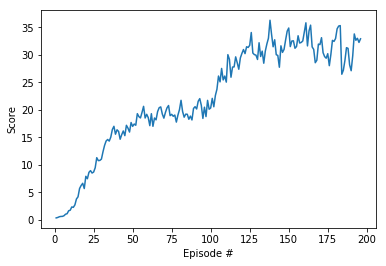

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
fig.savefig('scores.png')